In [29]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
import pandas as pd
import numpy as np

# Load Data

In [31]:
df_path = 'degrees-that-pay-back.csv'
df = pd.read_csv(df_path)
df.head()

,Undergraduate_Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000,77100,67.6,42200,56100,108000,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300,138000
4,Architecture,41600,76800,84.6,50600,62200,97000,136000


# Data Summarization and Exploration

In [32]:
#บอกจำนวน instant และ feature จากผลลัพธ์จะเห็นว่าทั้งหมดมี instant ทั้งหมด 50 ตัว และมี feature 8 ตัว
df.shape

(50, 8)

In [33]:
#ดูข้อมูลสถิติเบื้องต้น โดยผลลัพธ์ที่ได้จะประกอบไปด้วย จำนวน ค่าเฉลี่ย ส่วนเบี่ยงเบนมาตรฐาน ค่าต่ำสุด ค่าเปอร์เซ็นที่ 25 50 75 และค่าสูงสุดของแต่ละ feature
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [34]:
#เพื่อดูข้อมูลเบื้องต้น ทำให้ทราบว่าข้อมูลมี instant 50 ตัว มี feature 8 ตัว มีข้อมูลที่เป็น float 1 ตัว int 6 ตัว และ object 1 ตัว 
#และสามารถดูได้ว่า feature ใดบ้างที่มี missing จากผลลัพธ์จะเห็นว่าข้อมูลไม่มี missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate_Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     int64  
 2   Mid-Career Median Salary                           50 non-null     int64  
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     int64  
 5   Mid-Career 25th Percentile Salary                  50 non-null     int64  
 6   Mid-Career 75th Percentile Salary                  50 non-null     int64  
 7   Mid-Career 90th Percentile Salary                  50 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 3.2+ KB


# Cleaning data by missing

In [35]:
#เพื่อดูว่า feature ใดบ้างที่มี missing จากผลลัพธ์จะเห็นว่าไม่มีค่าว่าง
df.isnull().sum()

Undergraduate_Major                                  0
Starting Median Salary                               0
Mid-Career Median Salary                             0
Percent change from Starting to Mid-Career Salary    0
Mid-Career 10th Percentile Salary                    0
Mid-Career 25th Percentile Salary                    0
Mid-Career 75th Percentile Salary                    0
Mid-Career 90th Percentile Salary                    0
dtype: int64

# Cleaning data by nunique

In [36]:
#ให้ลบรายการที่ซ้ำออก เนื่องจากไม่มีค่าซ้ำจึงได้ instant 50 ตัว feature 8 ตัวเท่าเดิม 
df.drop_duplicates(inplace=True)
print(df.shape)

(50, 8)


# Cleaning data by dummy

In [37]:
#ดูว่าแต่ละ feature มี instant ที่ไม่มีแตกต่างกี่ค่า จากผลลัพธ์จะเห็นว่าทุก feature มีค่าแตกต่างกันหมด
df.nunique()

Undergraduate_Major                                  50
Starting Median Salary                               43
Mid-Career Median Salary                             49
Percent change from Starting to Mid-Career Salary    48
Mid-Career 10th Percentile Salary                    45
Mid-Career 25th Percentile Salary                    48
Mid-Career 75th Percentile Salary                    44
Mid-Career 90th Percentile Salary                    43
dtype: int64

In [38]:
# Undergraduate_Major เป็นค่า ground truth
df.head() 

,Undergraduate_Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000,77100,67.6,42200,56100,108000,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300,138000
4,Architecture,41600,76800,84.6,50600,62200,97000,136000


In [39]:
# Setting input features x and target output y
x = df.iloc[:,1:] #กำหนดให้ X เก็บทุก instant ยกเว้น feature แรก
y = df['Undergraduate_Major'] #กำหนดให้ y เก็บทุก instant ใน feature 'Undergraduate_Major'
n_class = len(np.unique(y)) ; print(n_class)
x.head()

50


,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,46000,77100,67.6,42200,56100,108000,152000
1,57700,101000,75.0,64300,82100,127000,161000
2,42600,71900,68.8,36300,52100,96300,150000
3,36800,61500,67.1,33800,45500,89300,138000
4,41600,76800,84.6,50600,62200,97000,136000


In [40]:
#ทำ scaler
scaler = StandardScaler() 
X_std = scaler.fit_transform(x)

# K-means

In [41]:
##Elbow method 
sse = [] #กำหนด list เปล่าเพื่อใส่ค่า sse
for i in range(1, 13): #เก็บค่า sse แต่ละโมเดลลงใน list ที่สร้างไว้ กำหนดให้ k เป็น 1-12 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) #define model
    kmeans.fit(X_std) #fit model
    sse.append(kmeans.inertia_) #เก็บค่า sse แต่ละ clusters ใน sse

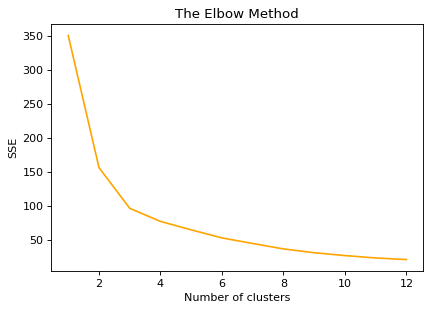

In [42]:
#จากภาพ จำนวน k จะเห็นว่า k=3 มีความเหมาะสมมากที่สุด
plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 13), sse, color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [43]:
#ทดลองใช้ โดยกำหนด n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto") #define model 
kmeans.fit(X_std) #fit model

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [44]:
#หา sse
kmeans.inertia_

102.25668638274303

In [45]:
#หา NMI
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,kmeans.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.4087409703336978

In [46]:
#จากผลลัพธ์จะเห็นว่ามี 3 centroids โดย centroids ที่ 1 feature ที่ 1 คือ -0.62537173
kmeans.cluster_centers_ 

array([[-0.62537173, -0.7974539 , -0.41883202, -0.68747015, -0.75507149,
        -0.77380569, -0.68023156],
       [ 0.02465381,  0.57900809,  1.10824492,  0.13011992,  0.34598685,
         0.74630829,  0.88174647],
       [ 1.65645371,  1.40041502, -0.30987194,  1.68701351,  1.58891013,
         1.1190746 ,  0.6903548 ]])

In [47]:
#เป็นการบอกว่าแต่ละตัวอยู่ cluster ไหน
kmeans.labels_ 

array([1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 0])

# agglomerative : linkage = 'single'

In [48]:
#agglomerative กำหนด n_clusters=3
clustering = AgglomerativeClustering(n_clusters=3, linkage = 'single') #define model 
clustering.fit(X_std) #fit model

AgglomerativeClustering(linkage='single', n_clusters=3)

In [49]:
##evaluation
#หา NMI
normalized_mutual_info_score(y,clustering.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.09527003747984276

# agglomerative : linkage = 'ward'

In [50]:
#agglomerative กำหนด n_clusters=3
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage = 'ward') #define model 
clustering_ward.fit(X_std) #fit model

AgglomerativeClustering(n_clusters=3)

In [51]:
##evaluation
#หา NMI
normalized_mutual_info_score(y,clustering_ward.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.4369151140845926

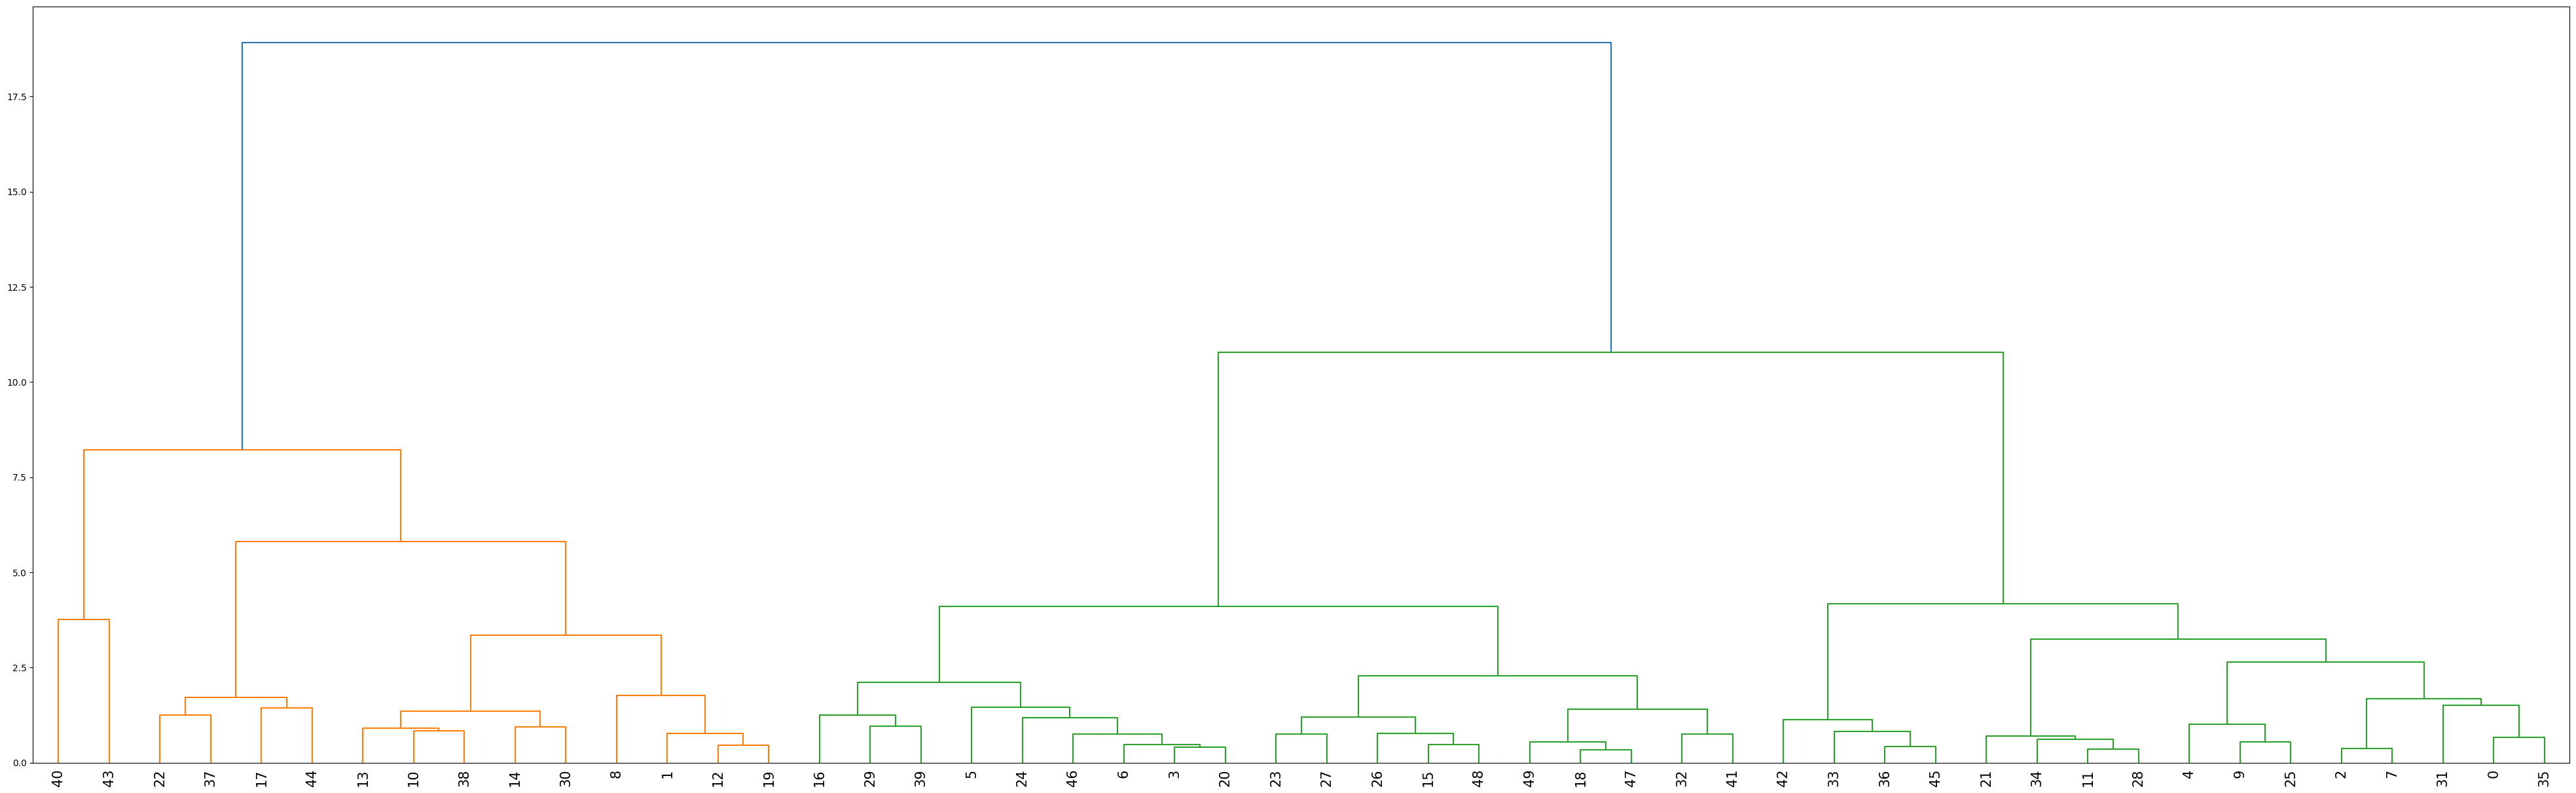

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(facecolor='w', figsize=(50,15))
dendrogram(linkage(X_std, method='ward'), leaf_font_size=15)
plt.show()

# agglomerative : linkage = 'complete'

In [25]:
#agglomerative กำหนด n_clusters=3
clustering_complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete') #define model 
clustering_complete.fit(X_std) #fit model

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [26]:
##evaluation
#หา NMI
normalized_mutual_info_score(y,clustering_complete.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.33670918489767454

# agglomerative : linkage = 'average'

In [27]:
#agglomerative กำหนด n_clusters=3
clustering_average = AgglomerativeClustering(n_clusters=3, linkage = 'average') #define model 
clustering_average.fit(X_std) #fit model

AgglomerativeClustering(linkage='average', n_clusters=3)

In [28]:
##evaluation
#หา NMI
normalized_mutual_info_score(y,clustering_average.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.3140337740930137